# colab 한글 깨짐 방지
- 실행후에 런타임 다시 시작할 것

In [1]:
import pandas as pd
import numpy as np

In [2]:
# !apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font_name = fm.FontProperties(fname=fontpath).get_name()
# fm._rebuild()


# %config InlineBackend.figure_format = 'retina'

# plt.rc('font', family=font_name)
# plt.rcParams['axes.unicode_minus'] = False

# [Seaborn](https://seaborn.pydata.org/)
> Matplotlib 기반으로 만들어진 촐계 데이터 시각화 라이브러리  
> 즉, Matplotlib 시각화 차트 기리기를 Seaborn이 쉽게 그릴 수 있도록 도와준다.

In [3]:
import seaborn as sns

sns.set_theme(style="darkgrid")

- Relational plots
> 두 변수의 관계를 볼 때
- Distribution plots
> 변수의 데이터 분포 볼 때
- Categorical plots
> 범주형 변수의 집계나 볌주형 변수와 수치형 변수간의 관계를 볼 때

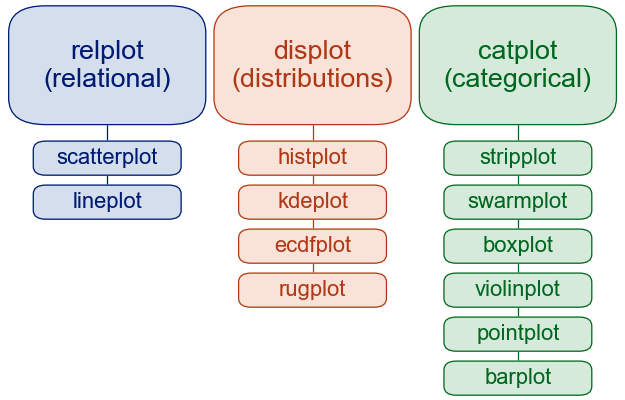

## Relational plots
- relplot(kind="scatter") # default
- relplot(kind="line")

### scatterplot

In [4]:
# 데이터 로드
tips = sns.load_dataset("tips")

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


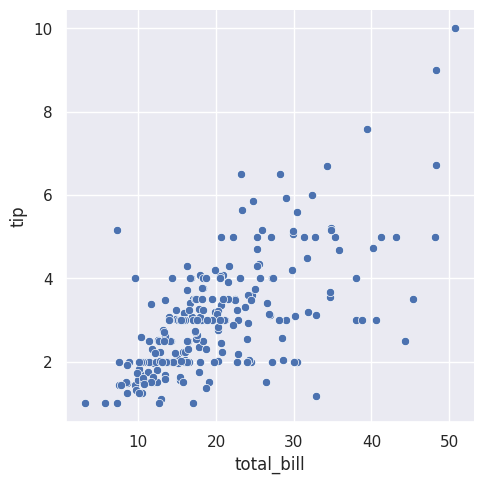

In [7]:
sns.relplot(data=tips, x="total_bill", y="tip", kind="scatter")

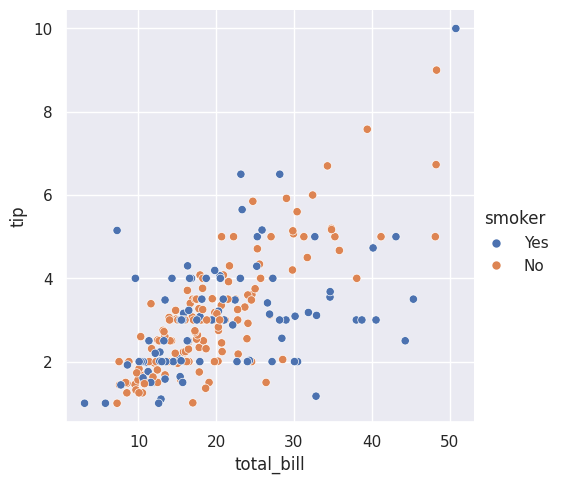

In [8]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

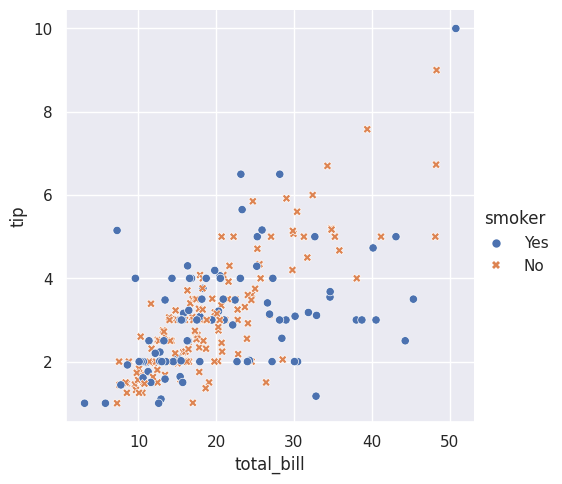

In [9]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="smoker"
)

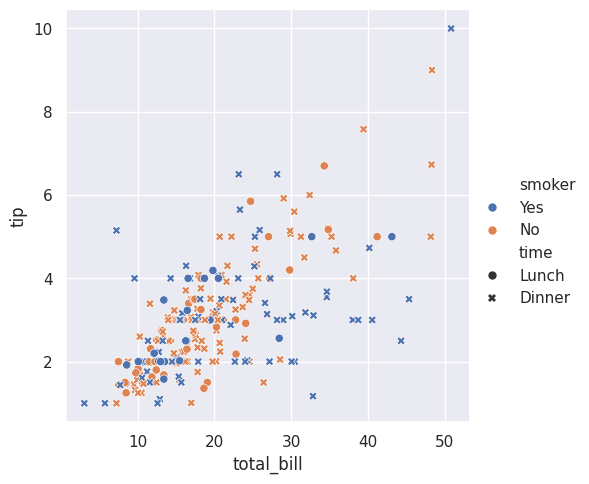

In [10]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="time"
)

위의 예제처럼 색상이나 모양은 범주형 데이터를 표현할 때 사용하기 좋다.  
숫자형 데이터인 경우에는 색상의 농도로 표현할 수 있다.

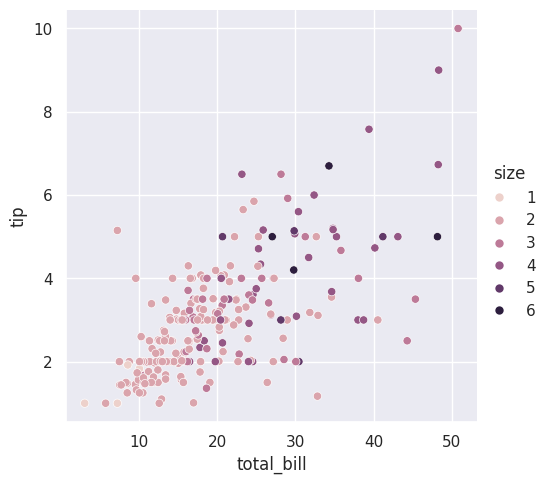

In [11]:
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
)

숫자형 데이터는 색상의 농도뿐만 아니라 크기로도 표현할 수 있다.

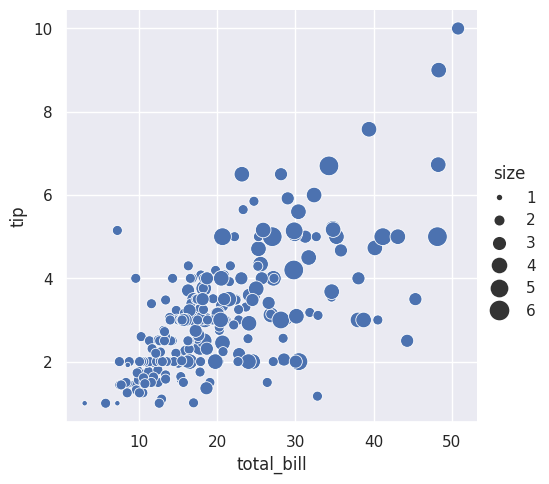

In [12]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
)

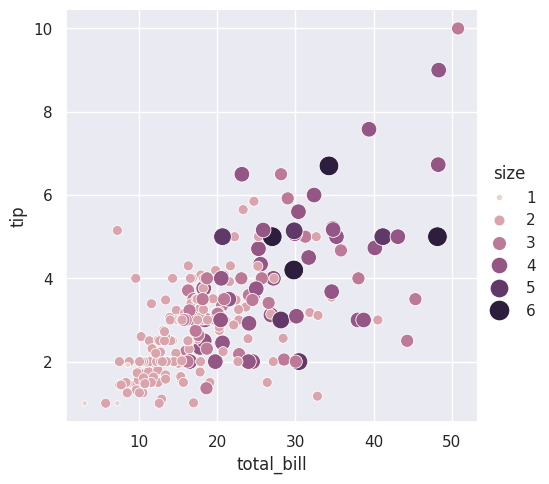

In [13]:
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
    size="size", sizes=(15, 200)
)

### lineplot
> 일부 데이터 세트의 경우 한 변수의 변화를 시간의 함수 또는 유사한 연속 변수로 이해하고자 할 수 있습니다. 이 상황에서 좋은 선택은 선 그림을 그리는 것입니다.

In [14]:
fmri = sns.load_dataset("fmri")

fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [15]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


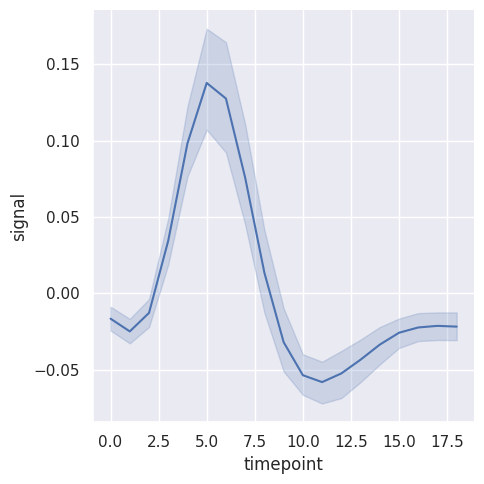

In [16]:
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

seaborn의 기본 동작은 x 평균과 평균 주위의 95% 신뢰 구간을 플로팅하여 각 값에서 여러 측정값을 집계한다.  
집계 작업을 끄려면 estimator=None으로 설정하면 된다.  

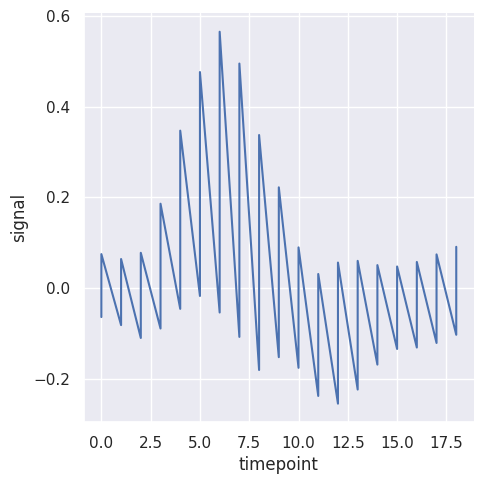

In [17]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None
)

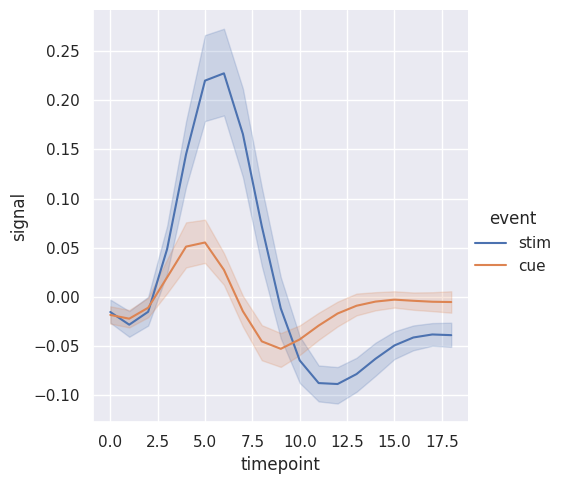

In [18]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
)

#### hue를 이용하여 하위 집합 분석
> 카테고리 데이터를 hue(색상으로 다르게 표현)를 이용하여 하위 집합으로 분석

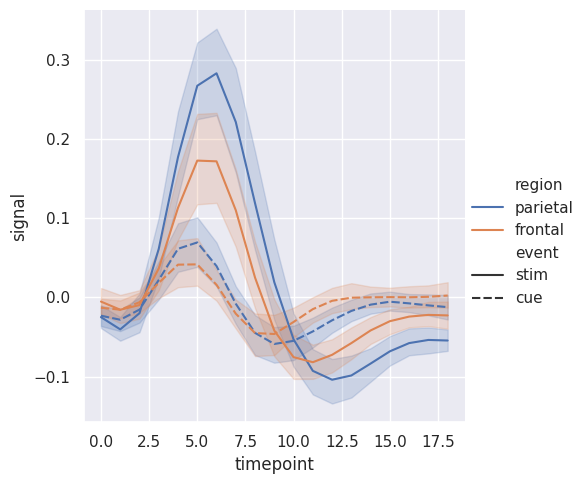

In [19]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
)

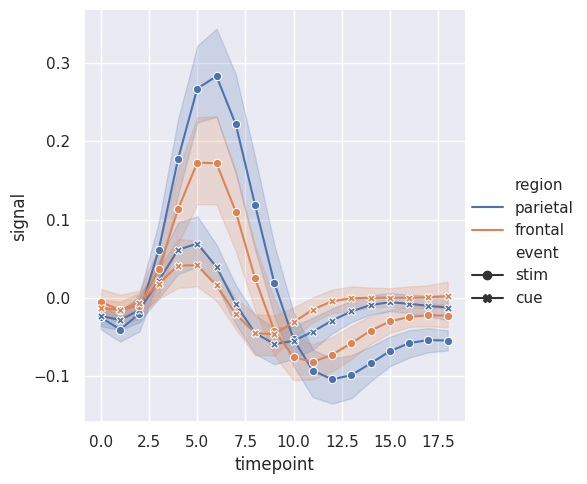

In [20]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

### 여러 관계 그래프

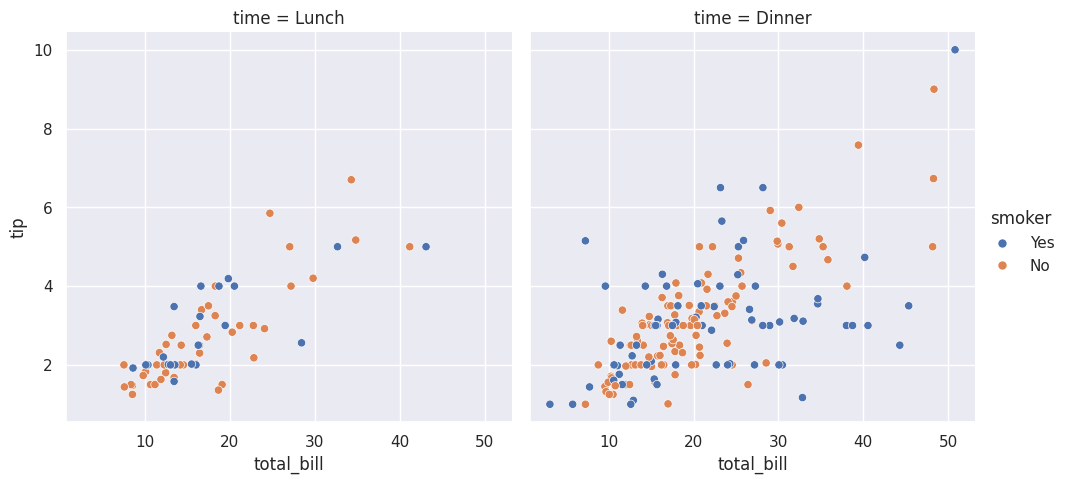

In [21]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", col="time", # col: 오른쪽에 그래프 추가
)

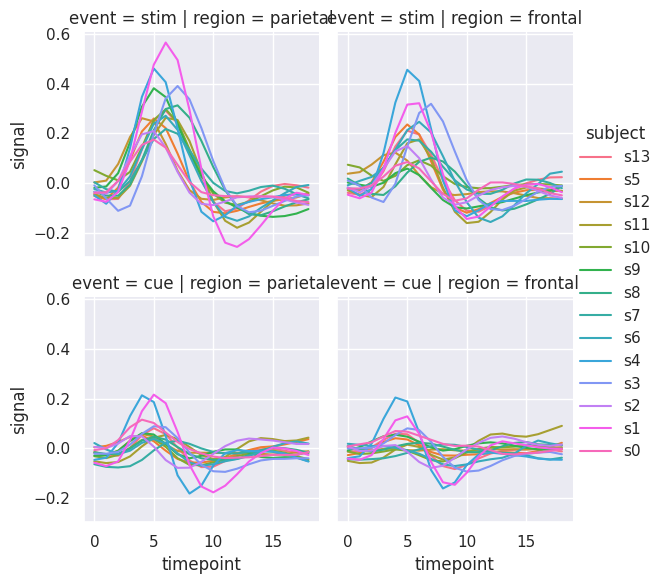

In [22]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3, # col, row 사용
    estimator=None
)

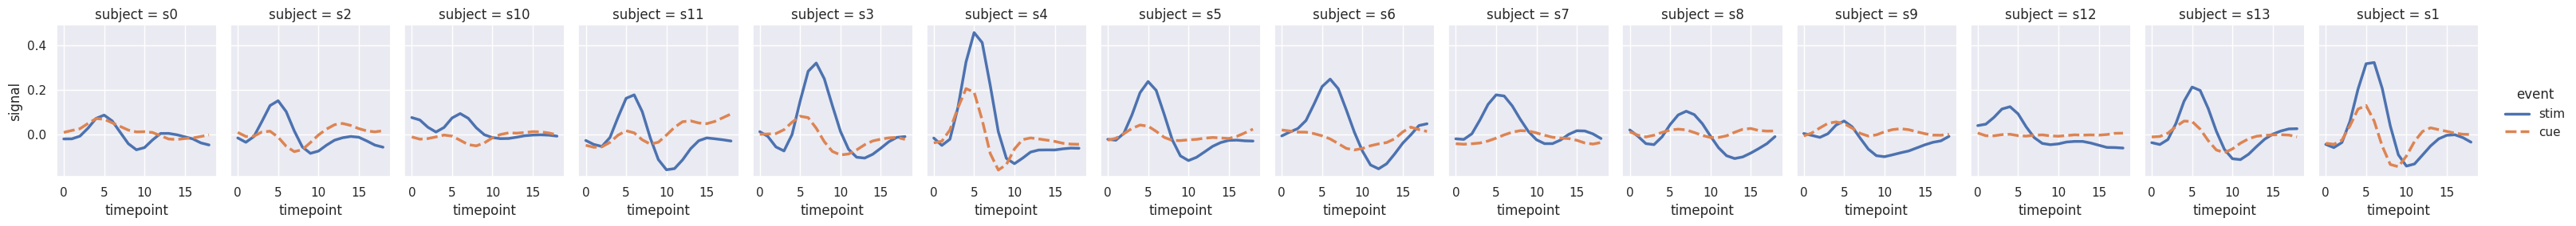

In [23]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject",
    height=3, aspect=.75, linewidth=2.5,
)

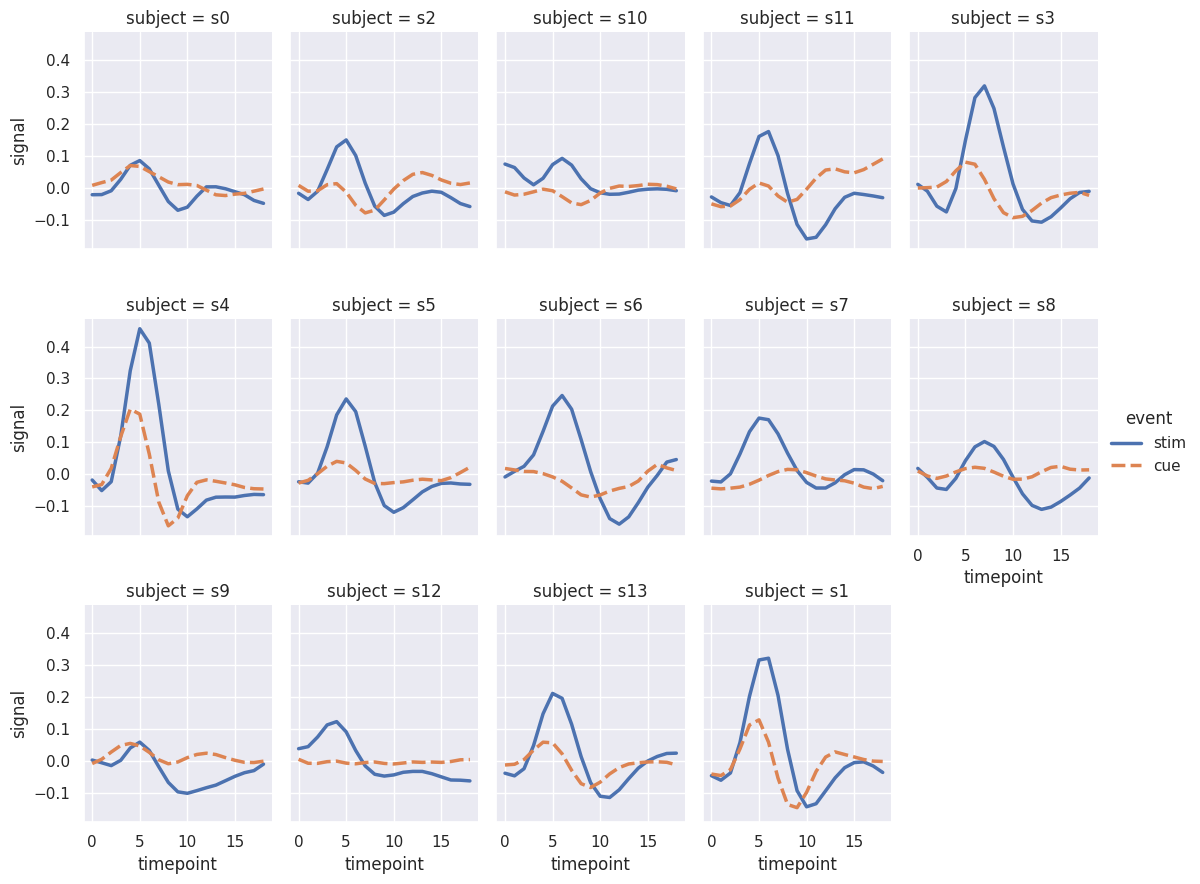

In [24]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5, # col_wrap: 5개 단위로 줄 바꿈
    height=3, aspect=.75, linewidth=2.5,
)

## Distribution plots

### histplot

In [25]:
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


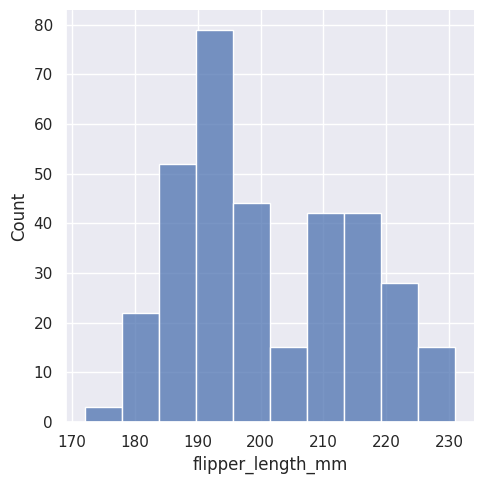

In [26]:
sns.displot(penguins, x="flipper_length_mm")

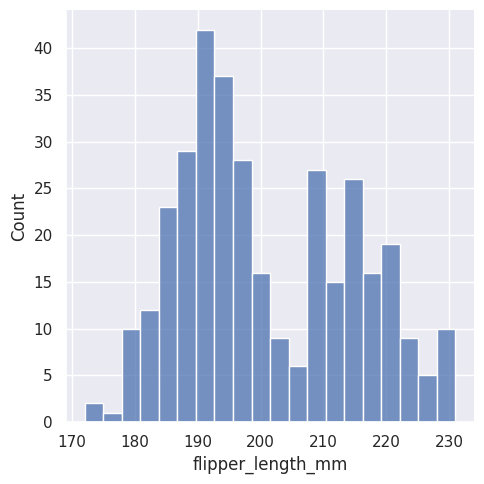

In [27]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

#### hue를 이용하여 추가 분석

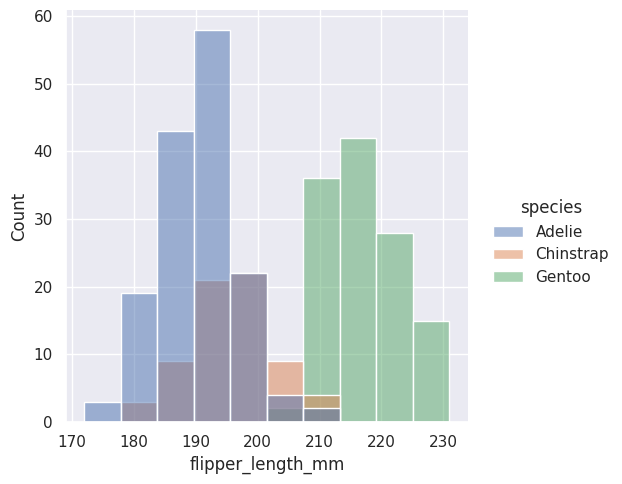

In [28]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

이렇게 여러 데이터가 겹치게 보여서 구분하기 힘든 경우, 아래와 같이 그래프롤 그릴 수 있다.

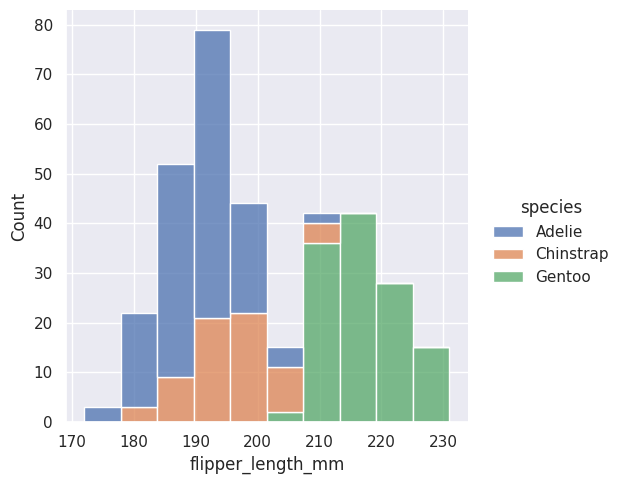

In [29]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

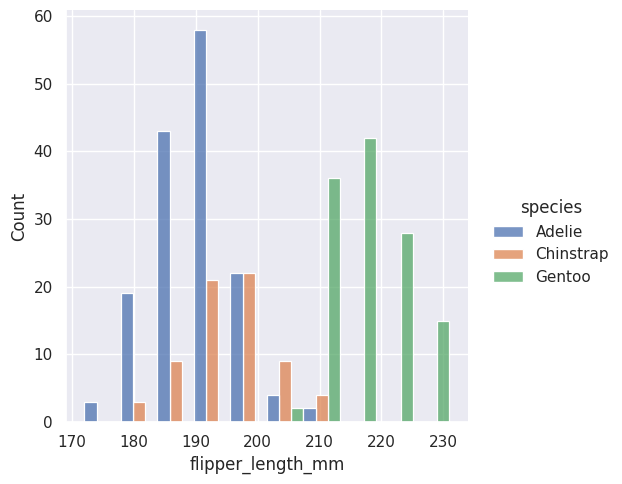

In [30]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="dodge")

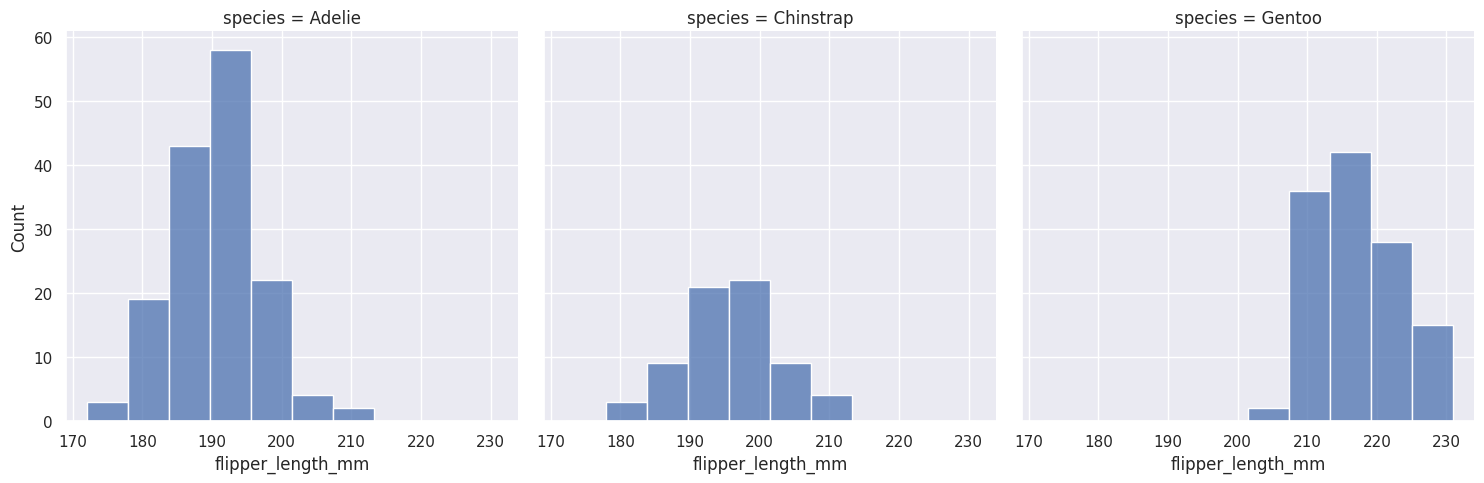

In [31]:
sns.displot(penguins, x="flipper_length_mm", col="species")

#### stat를 이용한 졍규화
> 하위 집합의 관측 수가 같지 않은 경우 개수 측면에서 분포를 비교하는 것이 이상적이지 않을 수 있다. 이런 경우 해결책으로 매개변수를 사용하여 카운트를 정규화 하는 것이다.

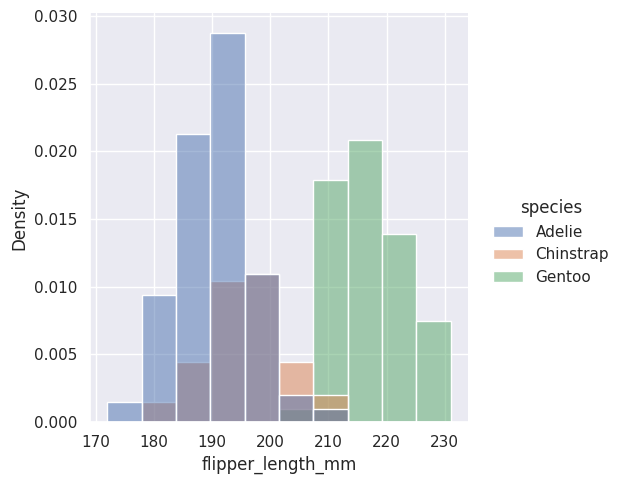

In [32]:
# density는 영역의 합이 1이 되도록 막대의 크기를 조정합니다.
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

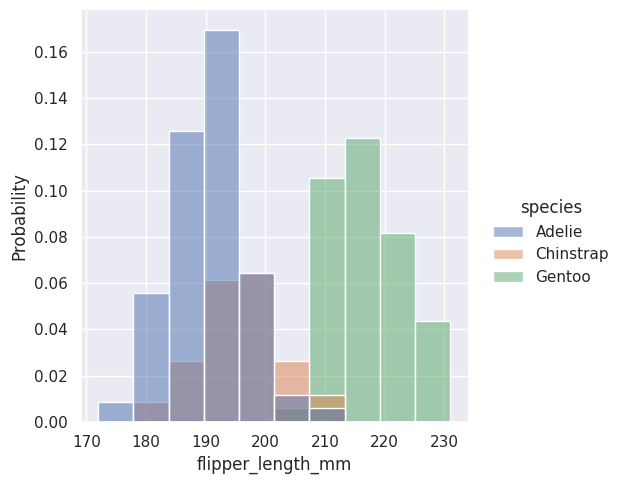

In [33]:
# probability는 높이의 합이 1이 되도록 정규화를 합니다. 이것은 변수가 이산형일 때 가장 의미가 있습니다.
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")

### kdeplot
> 히스토그램은 관측값을 범주화하고 계수하여 데이터를 생성한 기본 확률 밀도 함수를 근사화하는 것을 목표로 합니다. KDE(Kernel Density Estimation)는 동일한 문제에 대해 다른 솔류션을 제시합니다. KDE 플롯은 가우시안 커널로 관찰을 평활하하여 연속 밀도 추정치를 생성합니다.

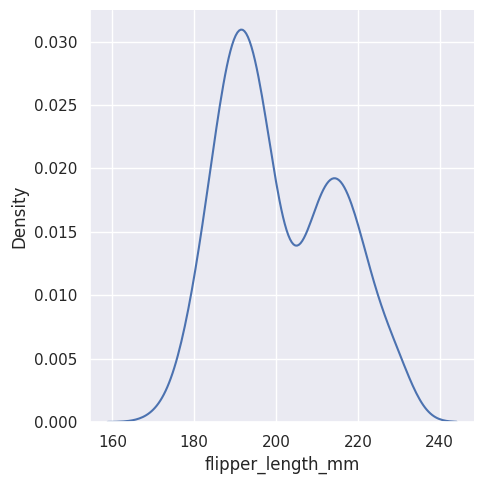

In [34]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

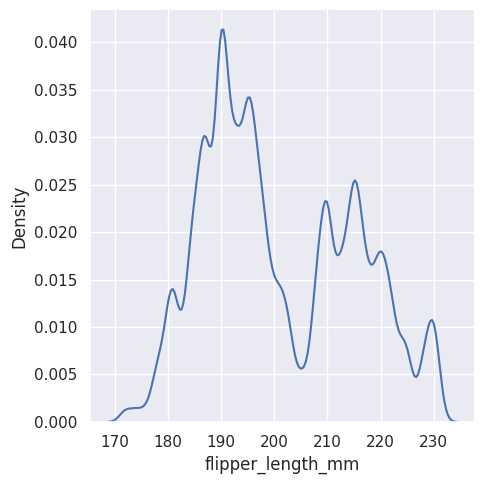

In [35]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25) # bw_adjust는 bins와 비슷한 역할을 한다.

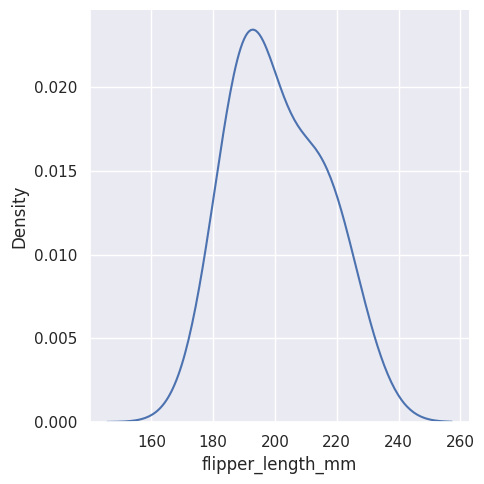

In [36]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

#### hue를 이용하여 추가 분석

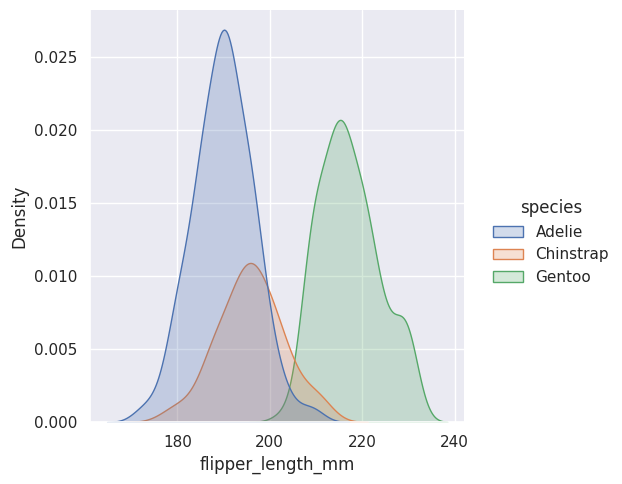

In [37]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

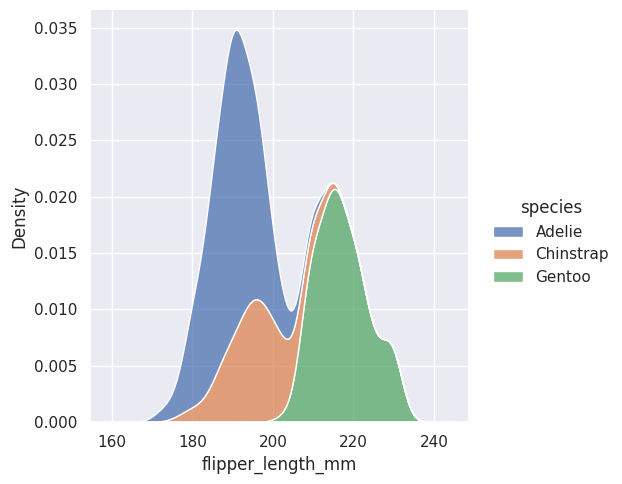

In [38]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

#### KDE 주의점

KDE 접근 방식은 불연속 데이터 또는 데이터가 자연스럽게 연속적이지만 특정 값이 과도하게 표현되는 경우에도 실퍠합니다.    
**명심해야 할 중요한 점은** 데이터 자체가 매끄럽지 않은 경우에도 KDE는 항상 부드럽게 곡선을 표시 한다는 것입니다.

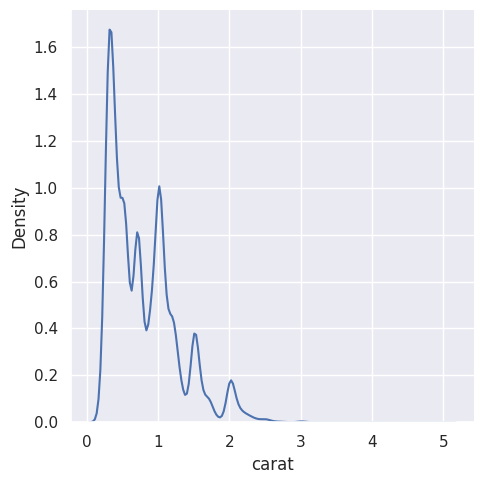

In [39]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

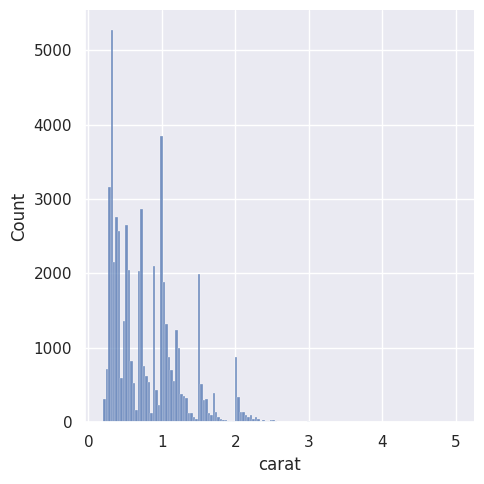

In [40]:
sns.displot(diamonds, x="carat")

따라서 아래와 같이 두 가지 그래프를 결합하는 것이 좋습니다.

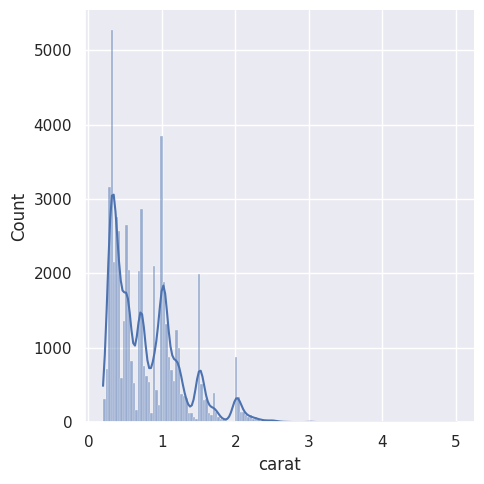

In [41]:
sns.displot(diamonds, x="carat", kde=True)

### ecdfplot
> 이 그래프는 곡선의 높이가 더 작은 값을 가진 관측치의 비율을 반영하도록 각 데이터 포인트를 통해 단조롭게 증가하는 곡선을 그립니다.

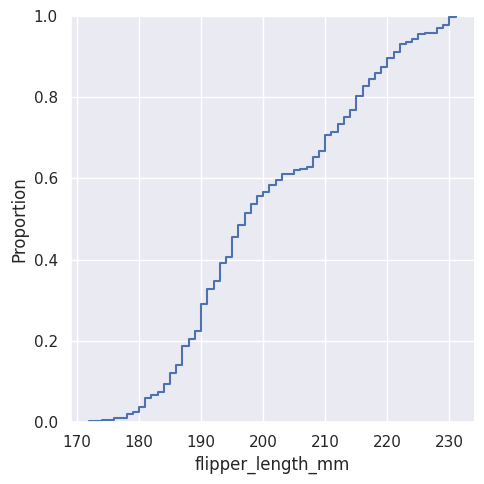

In [42]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

ECDF 그래프는 두 가지 주요 이점이 있습니다. 히스토그램이나 KDE와 달리 각 데이터 포인트를 직접 나타냅니다. 즉, 고려해야할 빈 크기나 스무딩 매개변수가 없습니다. 또한 곡선이 단조롭게 증가하기 때문에 여러 분포를 비교하는 데 적합합니다.

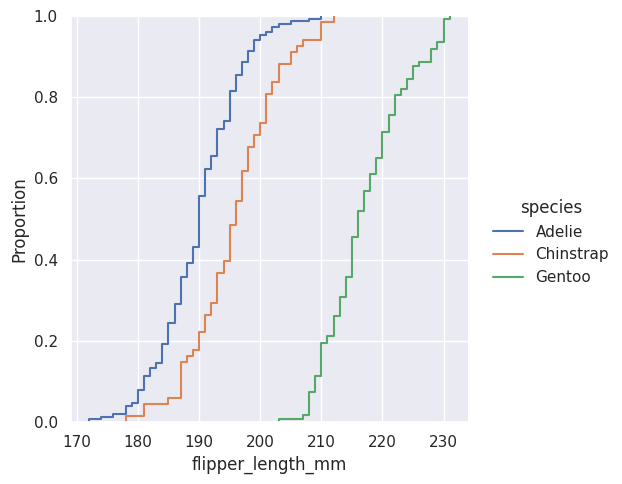

In [43]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

### rugplot

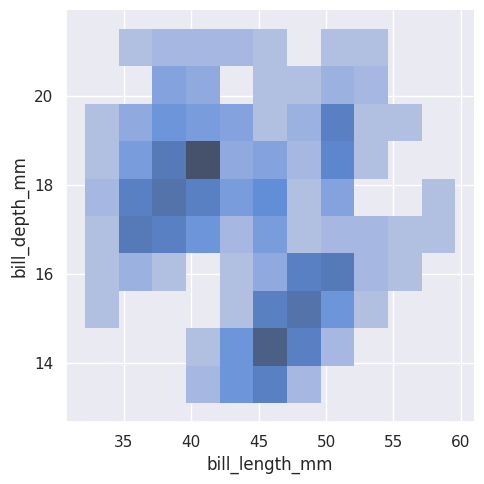

In [44]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

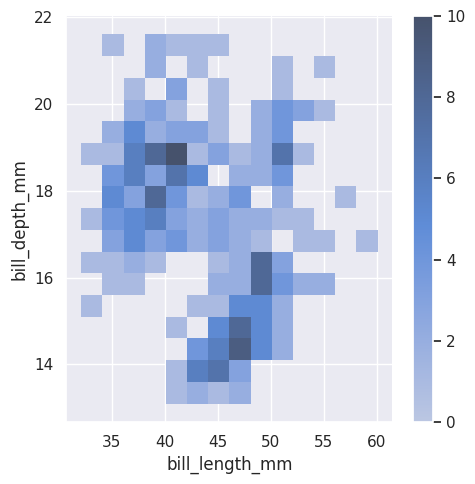

In [45]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

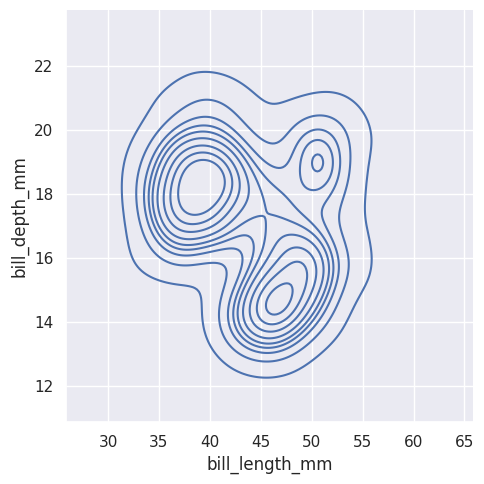

In [46]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde") # kde 적용

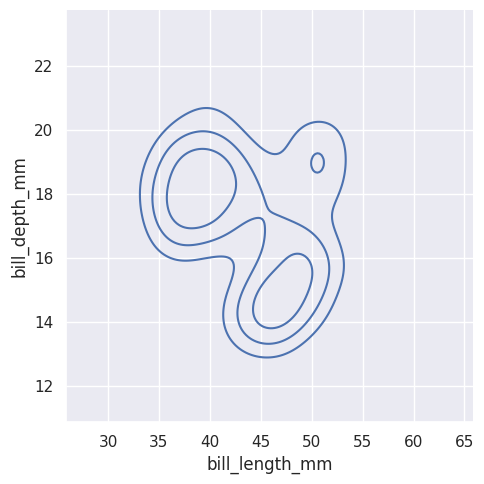

In [47]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4) # 4개의 레벨로 표현

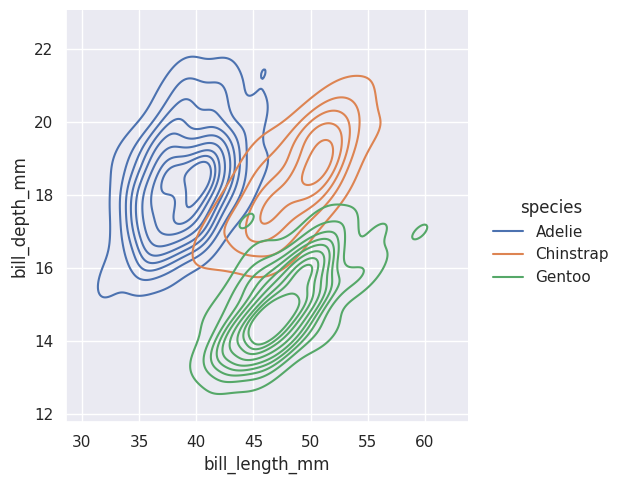

In [48]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde") # hue, kde 적용

### 다른 설정에서 분포 시각화

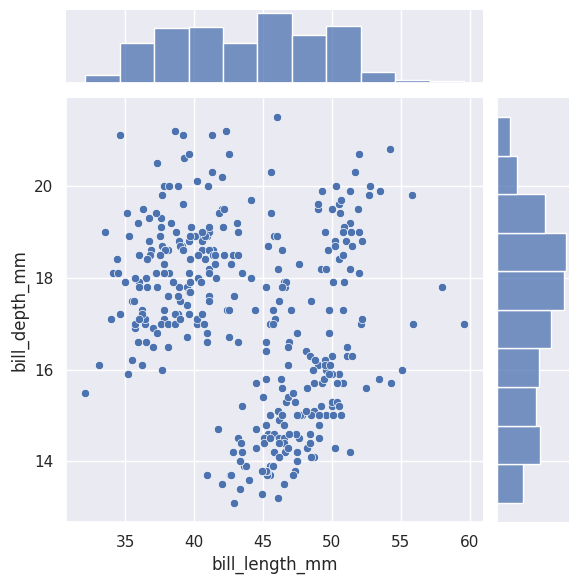

In [49]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

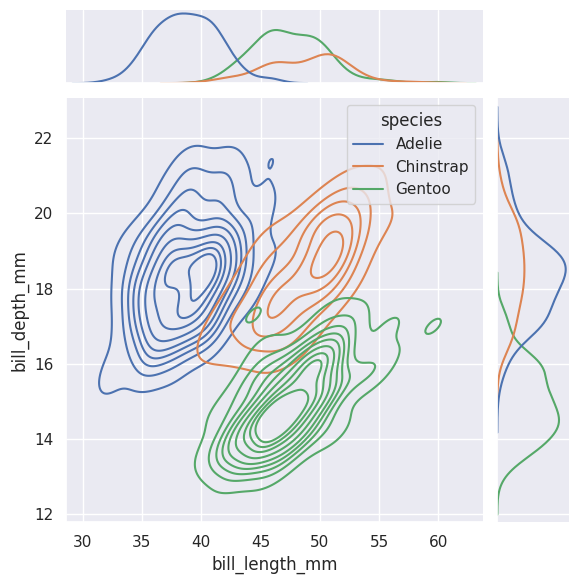

In [50]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

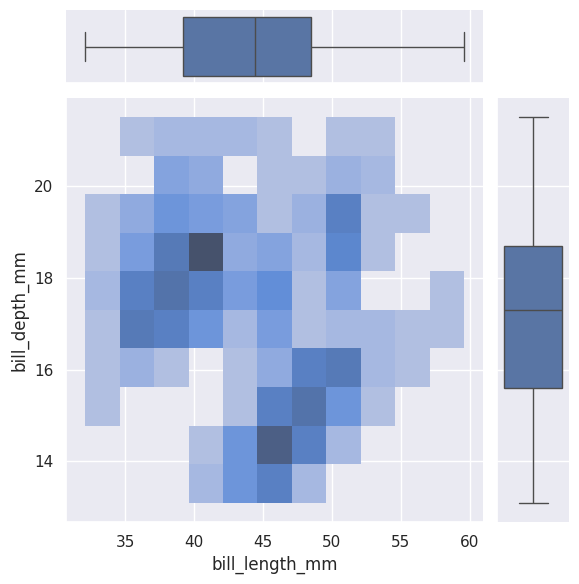

In [51]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

#### 많은 분포 그리기

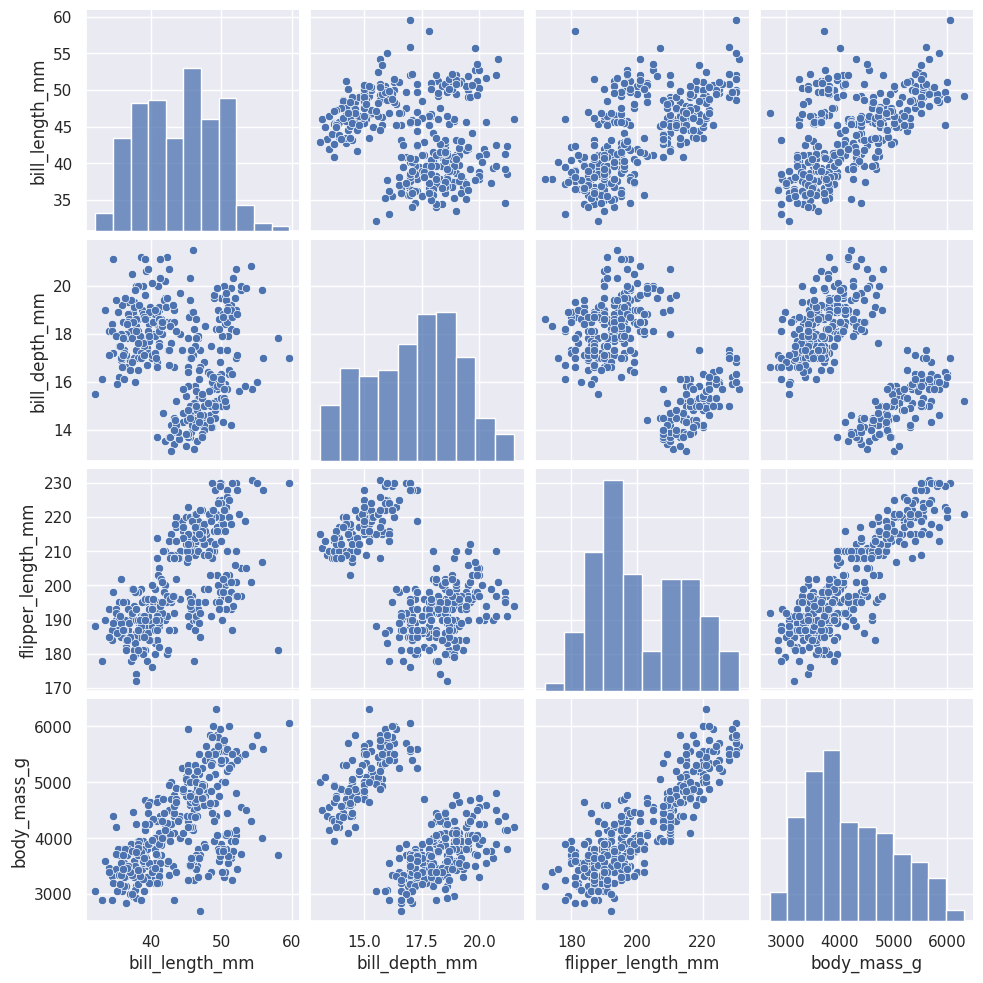

In [52]:
sns.pairplot(penguins)

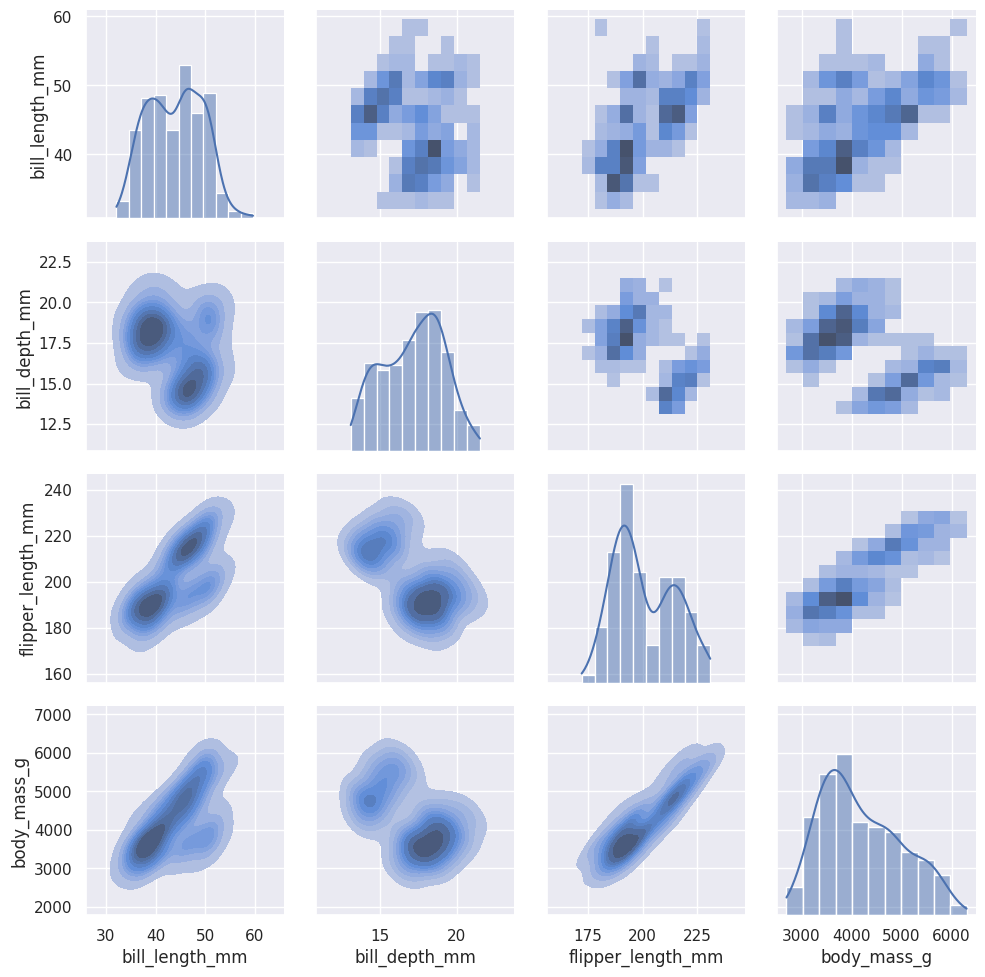

In [53]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

## Categorical plots

### 범주형 산점도

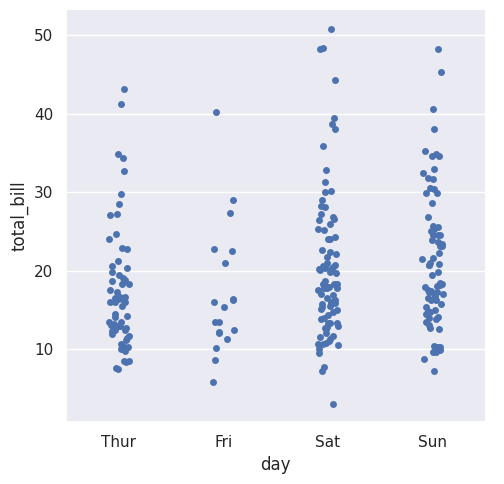

In [54]:
tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill") # 데이터가 많이 겹쳐있어서 정확한 분석이 힘들다.

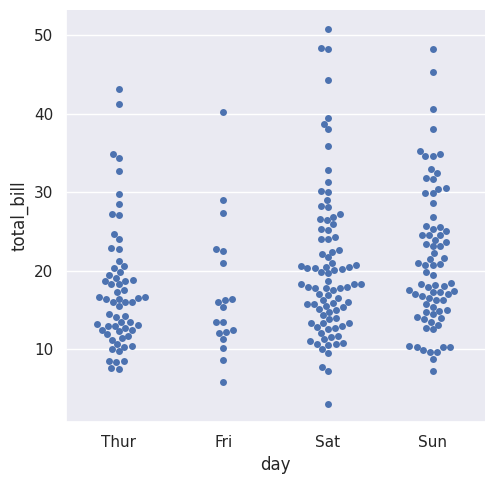

In [55]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm") # 어느 곳에 데이터가 많이 있는지 알기 쉽다.

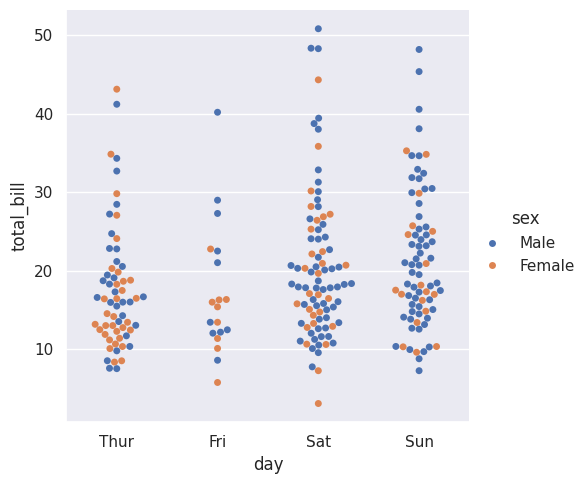

In [56]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

### 분포 비교

#### 박스 플롯

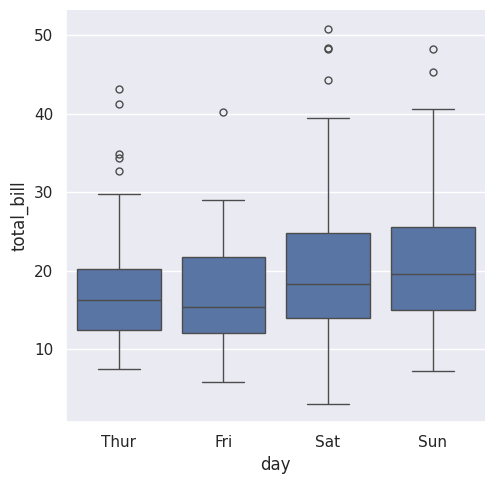

In [57]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

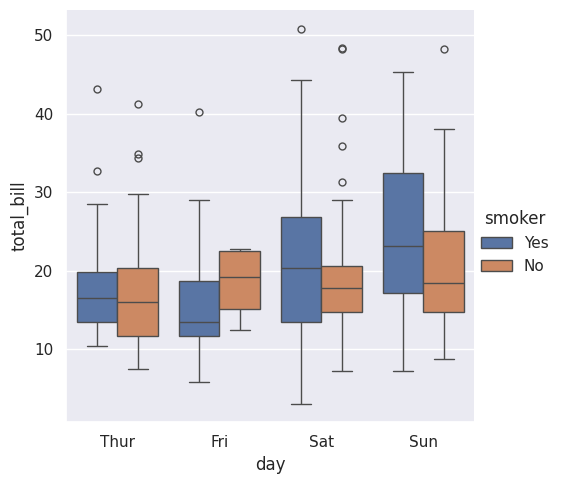

In [58]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

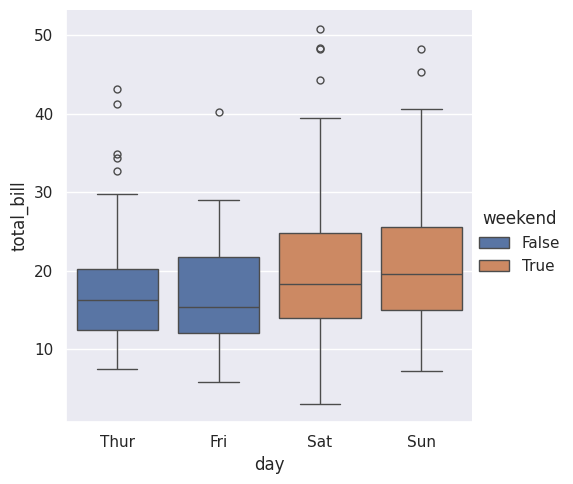

In [59]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(
    data=tips, x="day", y="total_bill", hue="weekend",
    kind="box", dodge=False,
)

#### 바이올린 플롯

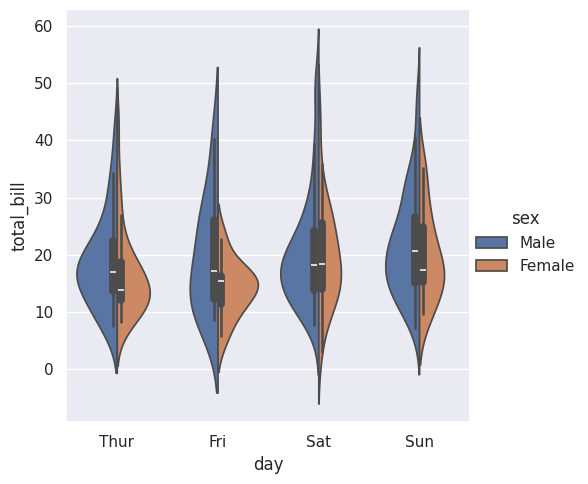

In [60]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", split=True,
)

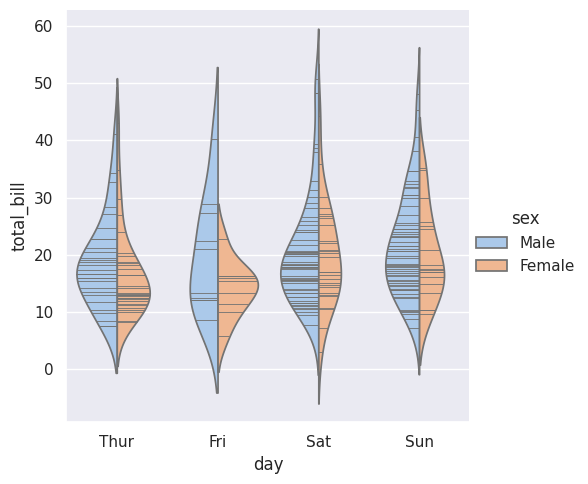

In [61]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
)

### 중심 경향 추청

#### 막대 그래프

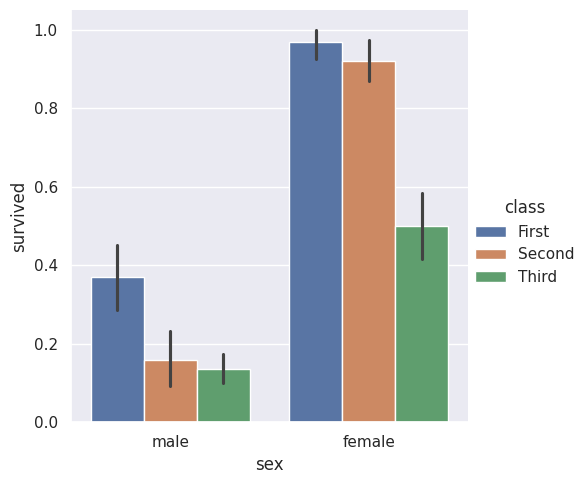

In [62]:
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

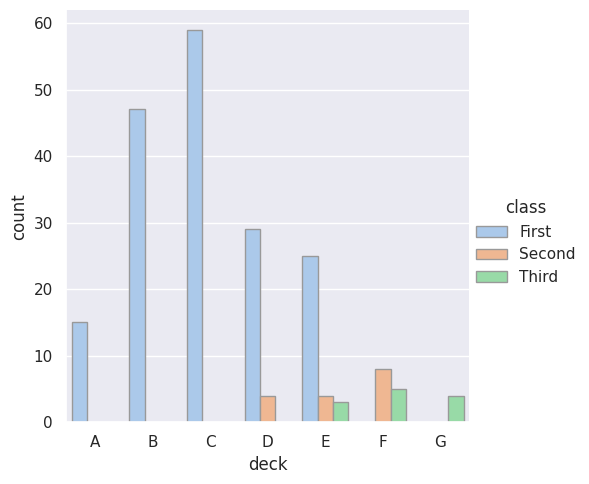

In [63]:
sns.catplot(
    data=titanic, x="deck", hue="class", kind="count",
    palette="pastel", edgecolor=".6",
)

#### 포인트 플롯

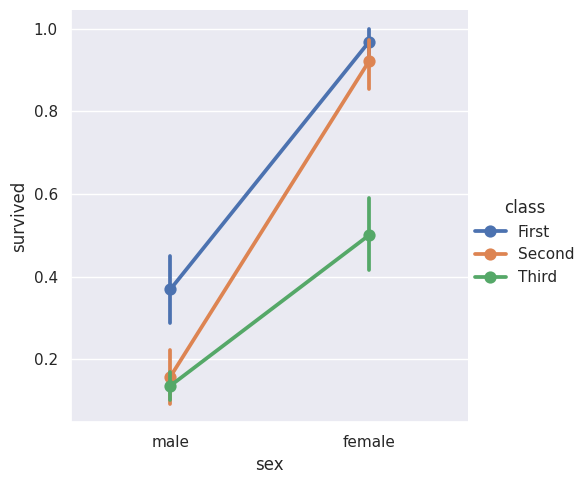

In [64]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

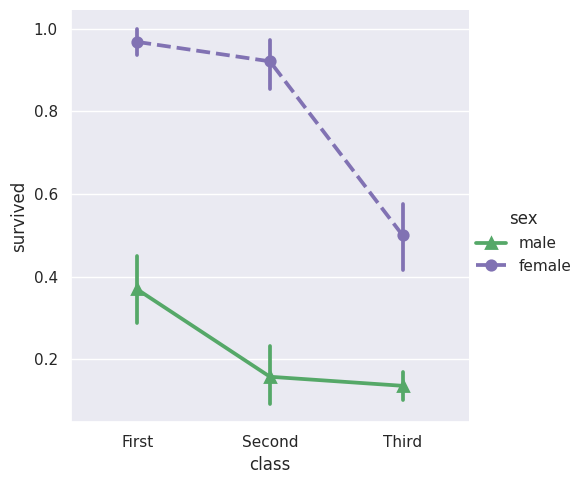

In [65]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

### 여러 그래프

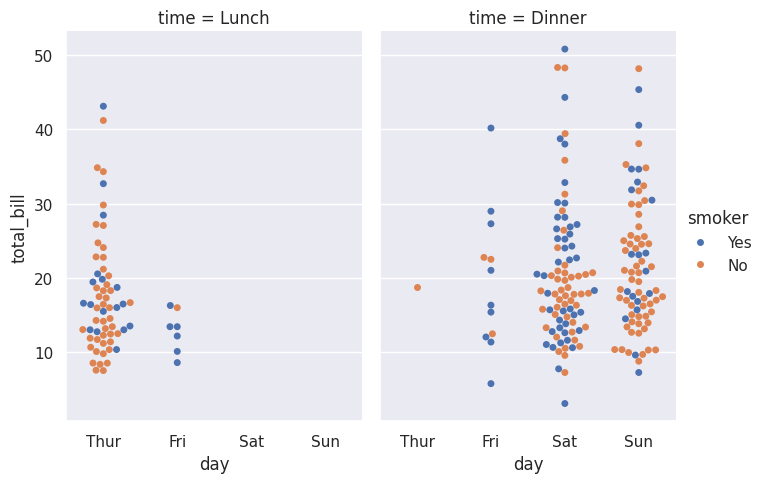

In [66]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="smoker",
    kind="swarm", col="time", aspect=.7,
)